In [141]:
## Necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf


#### Preprocessing

- Eliminar els asteriscos
- Juntar els punts que estan separats per un espai del final de la paraula

In [142]:
import re

def clean_text(text):
    # Replace all groups of asterisks with a single space
    text = re.sub(r"\*+", " ", text)
    
    # Replace multiple spaces with a single space and strip leading/trailing spaces
    text = re.sub(r"\s+", " ", text).strip()
    
    # Fix spacing before punctuation
    text = re.sub(r"\s+([.!?])", r"\1", text)
    
    return text


### ASHO SUMMARIES

In [159]:
asho_summaries = pd.read_json('Datasets/Asho_Dataset/uab_summary_2024_all (1).json')

In [160]:
asho_summaries['Text'] = asho_summaries['Text'].apply(clean_text)
asho_summaries['Summary'] = asho_summaries['Summary'].apply(clean_text)


In [161]:
sorted_indices = asho_summaries['Summary'].str.len().sort_values(ascending=False)
text_with_summaries = sorted_indices[sorted_indices > 10]

In [162]:
asho_summaries_sorted = asho_summaries.iloc[sorted_indices.index]
train_data = asho_summaries.iloc[text_with_summaries.index].reset_index()

In [163]:
print("Mean tokens input {}, mean tokens output {}".format(train_data['Text'].str.len().mean(), 
                                                           train_data['Summary'].str.len().mean()))

Mean tokens input 6967.4, mean tokens output 583.5


In [164]:
train_data.to_json('Datasets/Asho_Dataset/train_cleaned.json')

In [171]:
text_without_summaries = sorted_indices[sorted_indices <= 10]
asho_no_summaries = asho_summaries.iloc[text_without_summaries.index]
asho_no_summaries.to_json('Datasets/Asho_Dataset/asho_no_summaries.json')

In [172]:
asho_no_summaries = pd.read_json("Datasets/Asho_Dataset/asho_no_summaries.json")


### Asho Neg Dataset

In [150]:
negations_dataset = pd.read_json("Datasets/Asho_negation_Dataset/neg_data.json").drop(columns=['annotations'])
negations_dataset['Text'] = negations_dataset['data'].apply(lambda x: x['text'])


In [151]:
negations_dataset['Text'] = negations_dataset['Text'].apply(clean_text)


In [152]:
negations_dataset['Text'].to_json("Datasets/Asho_negation_Dataset/neg_data_cleaned.json")

In [176]:
asho_no_summaries = pd.read_json("/hhome/nlp2_g05/Asho_NLP/src/Datasets/Asho_Dataset/asho_no_summaries.json")


In [181]:
with open("/hhome/nlp2_g05/Asho_NLP/src/Datasets/Asho_negation_Dataset/neg_data_cleaned.json", "r") as f:
    negations_data = json.load(f)

In [182]:
negations_data

{'0': "nº historia clinica: nºepisodi: sexe: dona data de naixement: 06.06.1938 edat: 79 anys procedencia domicil/res.soc servei psiquiatria data d'ingres 10.05.2018 data d'alta 10.05.2018 16:46:41 ates per , ; , assumpta informe d'alta d'hospitalitzacio motiu d'ingres paciente de 79 años que acude derivada a urgencias de psiquiatria tras sim. antecedents -sin alergias mediamentosas conocidas - hipertension arterial en tratamiento farmaoclogico con tres farmacos. - dislipemia en tratamiento farmacologico. - sindrome ansioso depresivo de larga evolucion actualmente en tratamiento con venlafaxina y sertralina. refiere primera vinculacion con red de salud mental en el 2013 a raiz de la muerte desu marido, con sentimientos de tristeza, soledad, rumiaciones respecto a su marido y su muerte e importanteclinica ansiosa. se vincula a csma sant andreu donde inician tratamiento farmacologico con paroxetina sinseguimiento posterior. consta informe del alta de csma de zona de febrero 2016 dandose 

In [180]:
asho_no_summaries['Id']

72    VH002477457500000
68    VH002477256900000
69    VH002477256900000
70    VH002477256900000
71    VH002477256900000
            ...        
38           1006964149
37           1006940827
36           1006956811
35           1006924487
99    VH002477245200000
Name: Id, Length: 90, dtype: object

In [156]:
import json
with open("Datasets/Asho_negation_Dataset/neg_data_cleaned.json") as f:
    l = json.load(f)
l.values()

dict_values(["nº historia clinica: nºepisodi: sexe: dona data de naixement: 06.06.1938 edat: 79 anys procedencia domicil/res.soc servei psiquiatria data d'ingres 10.05.2018 data d'alta 10.05.2018 16:46:41 ates per , ; , assumpta informe d'alta d'hospitalitzacio motiu d'ingres paciente de 79 años que acude derivada a urgencias de psiquiatria tras sim. antecedents -sin alergias mediamentosas conocidas - hipertension arterial en tratamiento farmaoclogico con tres farmacos. - dislipemia en tratamiento farmacologico. - sindrome ansioso depresivo de larga evolucion actualmente en tratamiento con venlafaxina y sertralina. refiere primera vinculacion con red de salud mental en el 2013 a raiz de la muerte desu marido, con sentimientos de tristeza, soledad, rumiaciones respecto a su marido y su muerte e importanteclinica ansiosa. se vincula a csma sant andreu donde inician tratamiento farmacologico con paroxetina sinseguimiento posterior. consta informe del alta de csma de zona de febrero 2016 d

In [158]:
l.values()[0]

TypeError: 'dict_values' object is not subscriptable

### Dataset 1: Clinic_

In [44]:
train_data = pd.read_json("Datasets/Clinical_Dataset/train.jsonl", lines=True).drop(columns=['idx'])

In [45]:
train_data.columns

Index(['inputs', 'target'], dtype='object')

In [49]:
sort_str_series = lambda x: x.str.len().sort_values(ascending=False)
sorted_inputs = sort_str_series(train_data['inputs'])


In [53]:
train_data['inputs'].str.split().str.len()

0       29
1       48
2       31
3       23
4       36
        ..
2730    22
2731    43
2732    30
2733    23
2734    15
Name: inputs, Length: 2735, dtype: int64

In [4]:
sorting_targets = train_data['target'].str.split().str.len().sort_values(ascending=False)

In [5]:
sorting_targets

1407    119
669      78
1061     75
1416     72
692      69
       ... 
1909      1
797       1
486       1
1390      1
1486      1
Name: target, Length: 2735, dtype: int64

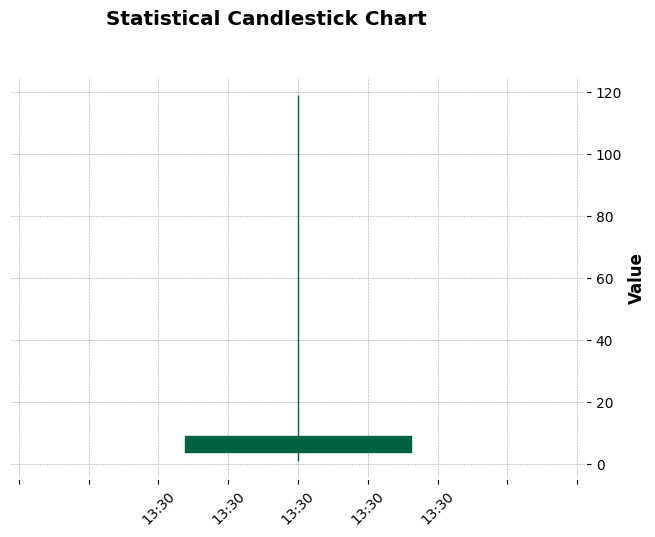

In [6]:
import pandas as pd

# Assume data_series is your pandas Series
data_series = sorting_targets

# Calculate the necessary statistics
q25 = data_series.quantile(0.25)
q75 = data_series.quantile(0.75)
mean = data_series.mean()
min_val = data_series.min()
max_val = data_series.max()

# Create a DataFrame to hold the OHLC data (you can tweak these assignments as needed)
ohlc_data = pd.DataFrame({
    'Open': [q25],
    'High': [max_val],
    'Low': [min_val],
    'Close': [q75]
})

# Create a DatetimeIndex (even though we have only one data point)
ohlc_data.index = pd.DatetimeIndex([pd.Timestamp.today()])

# Plot the candlestick chart
mpf.plot(ohlc_data, type='candle', style='charles',
         title='Statistical Candlestick Chart', ylabel='Value')


In [24]:
train_data.loc[len_indices]

,inputs,target
1407,The heart is mildly enlarged. The lungs are hy...,Hypoinflation with elevated left hemidiaphragm...
669,Chest. Heart size is normal. Pulmonary vascula...,1. Chest. Large nodule at the right lung base ...
1061,Lungs are hyperinflated with interstitial chan...,"1. Severe emphysema. 2. Irregular, pleural-par..."
1416,The heart size and pulmonary vascularity appea...,1. Right middle lobe lung nodule. Corresponds ...
692,"There are 2 ICD leads, one with the tip in the...","There are 2 ICD leads, one with the tip in the..."
...,...,...
1909,The lungs are hyperinflated with coarse inters...,Emphysema.
797,The cardiomediastinal silhouette is normal in ...,Negative.
486,There is hyperinflation of the lungs but they ...,COPD.
1390,The cardiomediastinal silhouette is normal in ...,Negative.


### ChatGpt Summaries

In [18]:
import json
with open('/hhome/nlp2_g05/Asho_NLP/src/chatgpt_summaries_gpt4.json') as f:
    data = json.load(f)

In [19]:
sum(data[key]['summary'].split().__len__() for key in data)/len(data)

231.8989898989899

In [20]:
import numpy as np